<a href="https://colab.research.google.com/github/lillibot2054/Car-Insurance-Claim-Prediction/blob/main/Car_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip car_insurance_data.zip


Archive:  car_insurance_data.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: nn
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# **Imports**

In [1]:
# ==============================
# Core Libraries
# ==============================
import numpy as np
import pandas as pd

# ==============================
# Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Scikit-learn
# ==============================
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# ==============================
# Utilities
# ==============================
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42


# **Loading Dataset**

In [4]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("sample_submission.csv")

print(" Files loaded successfully")
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


✅ Files loaded successfully
Train shape: (58592, 44)
Test shape : (39063, 43)


# **Initial Data Understanding**

 **Target Distribution (Class Imbalance)**

In [5]:
train_df['is_claim'].value_counts(normalize=True)


,proportion
is_claim,
0,0.936032
1,0.063968


**Missing Values Check**

In [6]:
missing = train_df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


,0


**Feature Type Identification**

In [7]:
TARGET = 'is_claim'

X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numerical features:", len(numerical_features))
print("Categorical features:", len(categorical_features))


Numerical features: 15
Categorical features: 28


# **Data Preprocessing Pipeline**

In [8]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# **Train-Validation Split**

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)


# **Baseline Model 1 — Logistic Regression**


In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


if 'train_df' not in globals():
    train_df = pd.read_csv("train.csv")

TARGET = 'is_claim'


if 'X_train' not in globals():
    X = train_df.drop(columns=[TARGET])
    y = train_df[TARGET]

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )


if 'preprocessor' not in globals():
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X_train.select_dtypes(include=['object']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
        ]
    )

print(" Environment restored successfully")


 Environment restored successfully


In [4]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

RANDOM_STATE = 42


logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        solver='saga',
        max_iter=300,
        class_weight='balanced',
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])


logistic_pipeline.fit(X_train, y_train)


y_pred_lr = logistic_pipeline.predict(X_val)
y_prob_lr = logistic_pipeline.predict_proba(X_val)[:, 1]


print("Baseline Model 1 — Logistic Regression")
print("Accuracy :", accuracy_score(y_val, y_pred_lr))
print("Precision:", precision_score(y_val, y_pred_lr))
print("Recall   :", recall_score(y_val, y_pred_lr))
print("F1 Score :", f1_score(y_val, y_pred_lr))
print("ROC-AUC  :", roc_auc_score(y_val, y_prob_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Baseline Model 1 — Logistic Regression
Accuracy : 0.9334414199163751
Precision: 0.10526315789473684
Recall   : 0.005333333333333333
F1 Score : 0.01015228426395939
ROC-AUC  : 0.58642550217279


# **Baseline Model 2 — Decision Tree**

In [10]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score


RANDOM_STATE = 42



num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor_dt = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
    ]
)



dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_dt),
    ('model', DecisionTreeClassifier(
        max_depth=8,
        class_weight='balanced',
        random_state=RANDOM_STATE
    ))
])


dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_val)
y_prob_dt = dt_pipeline.predict_proba(X_val)[:, 1]


print("Baseline Model 2 — Decision Tree")
print("F1 Score :", f1_score(y_val, y_pred_dt))
print("ROC-AUC  :", roc_auc_score(y_val, y_prob_dt))


Baseline Model 2 — Decision Tree
F1 Score : 0.15598190609889254
ROC-AUC  : 0.6304975841006473


# **Advanced Model — Random Forest**

In [12]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


RANDOM_STATE = 42


num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols)
    ]
)


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_split=10,
        class_weight='balanced',
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])


rf_pipeline.fit(X_train, y_train)


y_pred_rf = rf_pipeline.predict(X_val)
y_prob_rf = rf_pipeline.predict_proba(X_val)[:, 1]


print("Baseline Model 3 — Random Forest")
print("Accuracy :", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall   :", recall_score(y_val, y_pred_rf))
print("F1 Score :", f1_score(y_val, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_val, y_prob_rf))


Baseline Model 3 — Random Forest
Accuracy : 0.6495434764058367
Precision: 0.08298136645962732
Recall   : 0.44533333333333336
F1 Score : 0.13989528795811518
ROC-AUC  : 0.5895730999483393


# **Confusion Matrix**

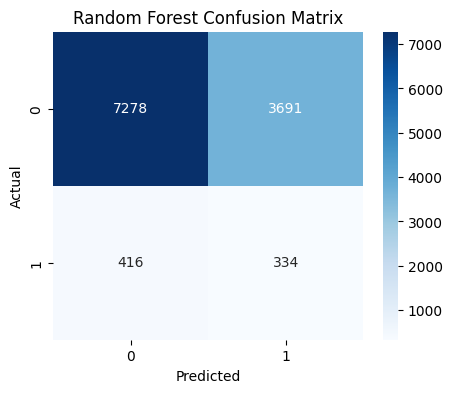

In [14]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_val, y_pred_rf)


plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")

plt.show()


# **Feature Importance**

In [16]:

import pandas as pd
import numpy as np


preprocessor = rf_pipeline.named_steps['preprocessor']
rf_model = rf_pipeline.named_steps['model']


num_features = preprocessor.transformers_[0][2]


cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out()


feature_names = np.concatenate([num_features, cat_features])


importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(10)


,feature,importance
0,policy_tenure,0.072955
1,age_of_car,0.023218
2,age_of_policyholder,0.011265
3,population_density,0.009969
46912,segment_B2,0.005634
46908,area_cluster_C8,0.004955
11,width,0.004469
46930,max_torque_113Nm@4400rpm,0.004058
46907,area_cluster_C7,0.003914
46896,area_cluster_C17,0.003889


# **Final Prediction on Test Data**

In [18]:

import pandas as pd


test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("sample_submission.csv")


test_predictions = rf_pipeline.predict_proba(test_df)[:, 1]

submission_df['is_claim'] = test_predictions

submission_df.to_csv("final_submissioni.csv", index=False)

print("Submission file saved as final_submission.csv")
submission_df.head()


✅ Submission file saved as final_submission.csv


,policy_id,is_claim
0,ID58593,0.492801
1,ID58594,0.502293
2,ID58595,0.474020
3,ID58596,0.490000
4,ID58597,0.489659
